**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! The project is accepted. Good luck on the final sprint!

# Gym Chain Customer Retention Project

The project's goal is to help the Model Fitness gym chain in developing customer interaction strategy that will improve customer churn rate.<br>
Based on data analysis of customers digitized profiles, we'll explore the factors the impact churn most, predict the probability of churn for each customer, and come up with a retention strategy.

The analysis process outline:
- Defining the task and project's goals 
- Studying general information of the data
- Exploratory data analysis (EDA) - study of features distribution and relationships
- Building binary classification models to predict user churn, evaluating model quality
- Training a clustering model and predicting customer clusters
- Study of features distribution by clusters
- Calculating Churn rate by clusters
- Overall conclusions and recommendations

## General information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/datasets/gym_churn_us.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Looking for duplicates:

In [4]:
data.duplicated().sum()

0

## Exploratory  data analysis (EDA)

The data doesn't contain missing values and duplicates, and all the data types seem appropriate. <br>
However, we would better change the column names to lowercase:<br>

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

**The mean values and standard deviation, general statistics**

In [6]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

**The mean feature values in two groups: for those who left (churn) and for those who stayed**<br>
We'll group the data by 'churn' to create the two groups, then display the mean values of the featues:

In [7]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


The mean features table expose differences between the groups, as the customers who stayed have higher mean values in all the features presented except two - gender and phone. <br>
This finding might imply a relationship between these features and churn rate, though a further investigation in needed.

**Bar histograms and feature distributions for those who left (churn) and those who stayed**<br>
To plot histograms and study distributions for each group, we'll split the data into 2 groups by the churn value, drop the churn column, and then create a for loop that will plot the graphs of the features: 

In [8]:
left_data = data[data['churn'] == 1].drop('churn', axis=1)
stayed_data = data[data['churn'] == 0].drop('churn', axis=1)
print('Number of customers who left:', left_data.shape[0])
print('Number of customers who stayed:', stayed_data.shape[0])

Number of customers who left: 1061
Number of customers who stayed: 2939


Plotting histograms and bar plots, starting with customers who left:

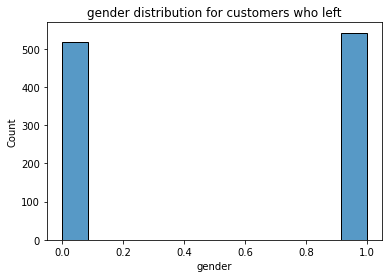

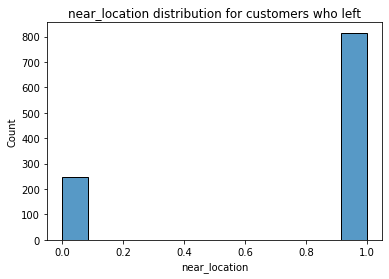

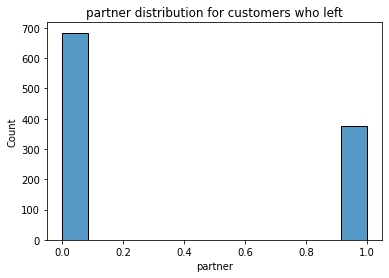

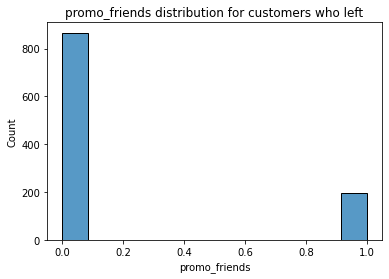

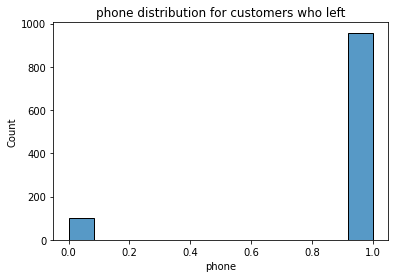

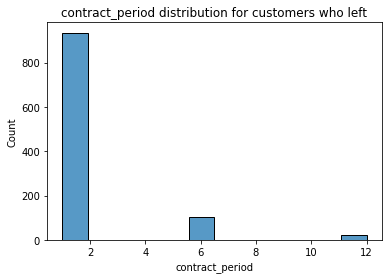

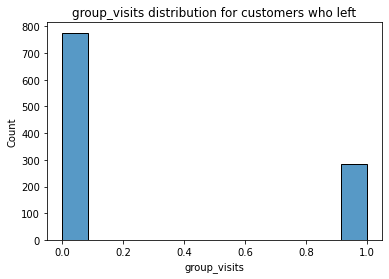

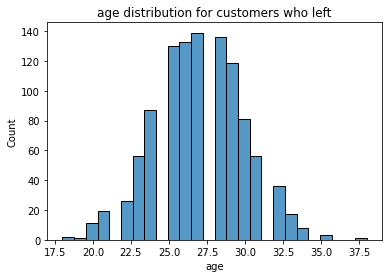

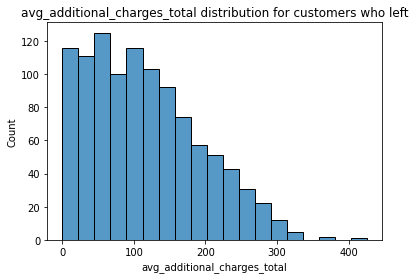

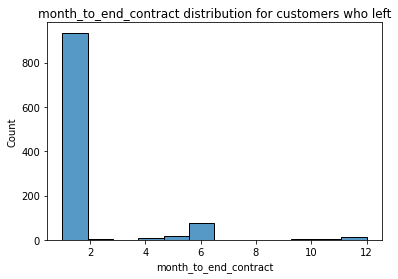

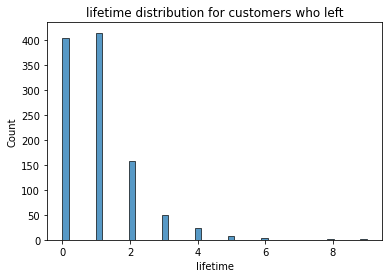

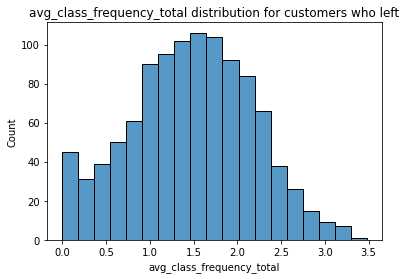

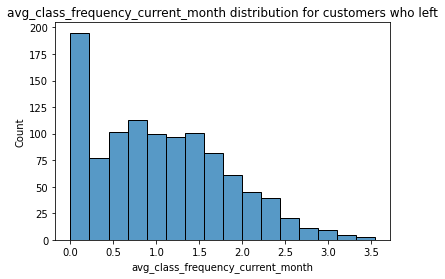

In [9]:
for i in left_data.columns:
    sns.histplot(data=left_data, x=i)
    plt.title(i + ' distribution for customers who left')
    plt.show()

Statistical overview of the numerical variables - age, additional charges, average number of visits per week over the customer's lifetime , average number of visits per week in the preceding month, for **customers who left:**

In [10]:
left_data[['age','avg_additional_charges_total','avg_class_frequency_total',
          'avg_class_frequency_current_month']].describe()

,age,avg_additional_charges_total,avg_class_frequency_total,avg_class_frequency_current_month
count,1061.000000,1061.000000,1061.000000,1061.000000
mean,26.989632,115.082899,1.474995,1.044546
std,2.895163,77.696419,0.694705,0.770237
min,18.000000,0.148205,0.000000,0.000000
25%,25.000000,50.629127,1.010771,0.421337
50%,27.000000,103.814686,1.491187,0.979445
75%,29.000000,165.616858,1.956438,1.588576
max,38.000000,425.535220,3.478646,3.540271


Features distributions for customers who stayed:

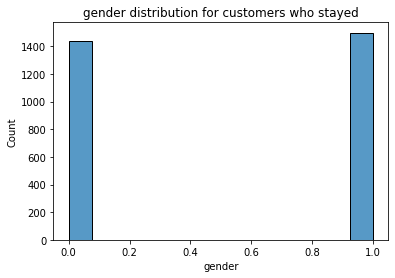

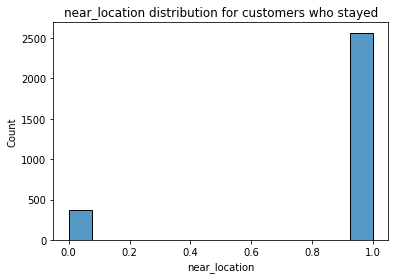

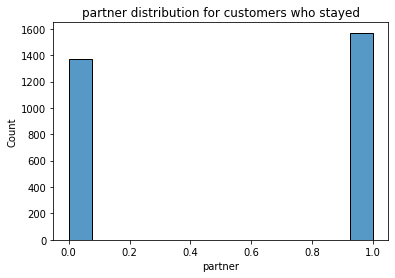

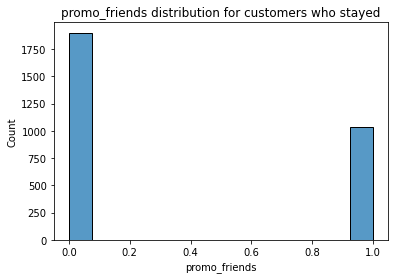

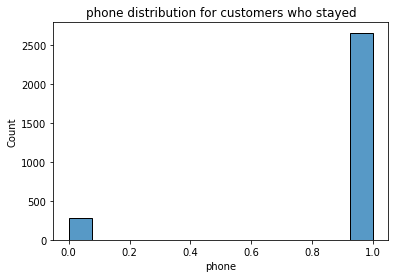

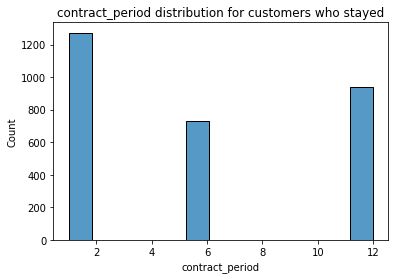

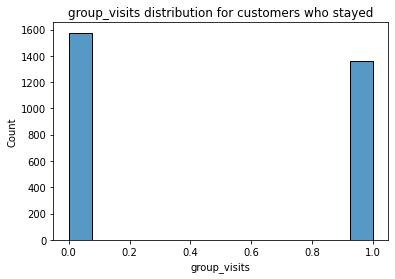

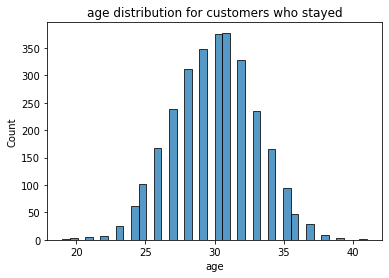

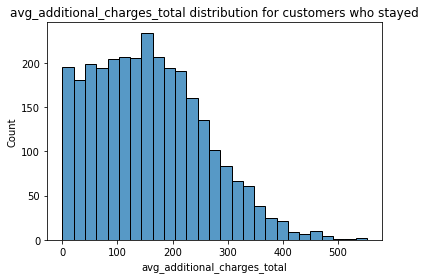

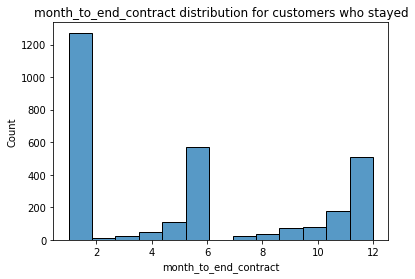

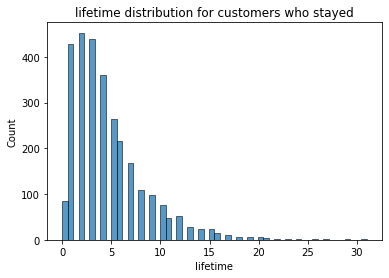

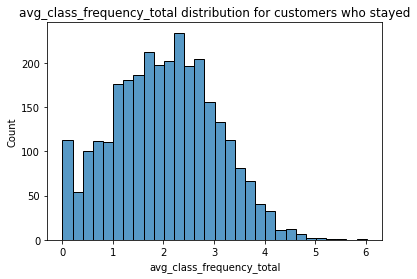

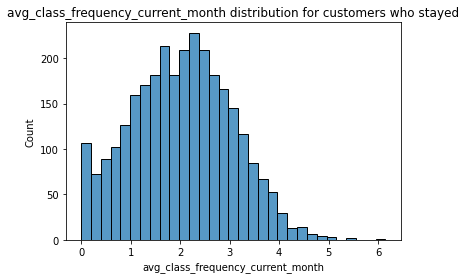

In [11]:
for i in stayed_data.columns:
    sns.histplot(data=stayed_data, x=i)
    plt.title(i + ' distribution for customers who stayed')
    plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment</b>

It would be easier to compare distributions if you put the plots for the two groups on the same axis (like [this](https://seaborn.pydata.org/tutorial/distributions.html#conditioning-on-other-variables))

</div>

Statistical overview of the numerical variables - age, additional charges, average number of visits per week over the customer's lifetime , average number of visits per week in the preceding month, for **customers who stayed:**

In [12]:
stayed_data[['age','avg_additional_charges_total','avg_class_frequency_total',
          'avg_class_frequency_current_month']].describe()

,age,avg_additional_charges_total,avg_class_frequency_total,avg_class_frequency_current_month
count,2939.000000,2939.000000,2939.000000,2939.000000
mean,29.976523,158.445715,2.024876,2.027882
std,3.009933,99.801599,1.016006,1.018994
min,19.000000,0.171862,0.000000,0.000000
25%,28.000000,76.920993,1.283137,1.297021
50%,30.000000,149.881171,2.043252,2.046697
75%,32.000000,224.448274,2.732944,2.740648
max,41.000000,552.590740,6.023668,6.146783


**Summary of variables' distribution, customers who left:**<br>
General characterization of customers who left based on the above distributions:<br>
- Live close to the gym
- Not an employee of a partner company
- Didn't sign up originally through a "bring a friend" offer
- Contract period of 1 month (88%)
- Didn't take part in group sessions (participation of 27% only)
- Average age of 27
- up to 2 month passed since their first visit
- Average of 1.5 visits per week over the whole period
- Average of 1 visit per week over the preceding month
- Spent a total amount of 100 USD (median value) on other gym services

**Summary of variables' distribution, customers who stayed:**<br>
General characterization of customers who stayed based on the above distributions:<br>
- Live close to the gym
- 53% are employees of a partner company
- Didn't sign up originally through a "bring a friend" offer (though a smaller difference between groups comparing to the left customers data)
- Contract periods of 1, 6 and 12 months (43%, 25% and 32% respectively) 
- Almost half (46%) took part in group sessions
- Average age of 30
- up to 4 month passed (median value) since their first visit
- Average of 2 visits per week over the whole period
- Average of 2 visit per week over the preceding month
- Spent a total amount of 150 USD (median value) on other gym services

The above summary leads to the following intermediate conclusions regarding the differences between the two groups of customers:<br>
The customers who left had a short period contract (1 month), most of them didn't participate on group sessions, they have visited the gym for a short period, with a lower frequency of visits that decresaed over the preceding mont, and they spent less on additional gym services.<br>
These results should be taken into account later while building the customer retention strategy.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good, you compared the two groups and made some useful observations!

</div>

**Correlation Matrix** <br>
To study the feature-target and feature-feature raltionships, we'll build a correlation matrix and display it in a heatmap:

In [13]:
cm = data.corr()
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


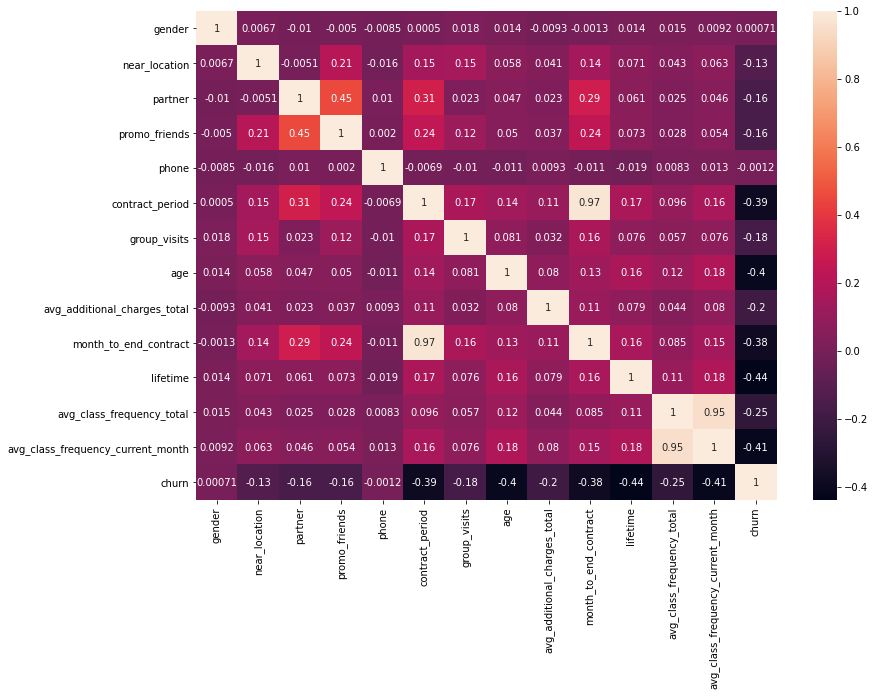

In [14]:
plt.figure(figsize=(13,9))
sns.heatmap(cm, annot=True)
plt.show()

The correlation heatmap doesn't provide us with a meaningful information, as the churn varibale has weak relationships with the features, so are the relatioships within the features (ignoring the relationship between the two visit frequency features that is obviously strong).

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!
    

</div>

## Model to predict customer churn

**Binary classification model** <br>
We'll build our model using the Logistic Regression and Random Forest algorithms. The target feature is the customer leaving next month ('churn').

Dcalring features and target variables:

In [15]:
X = data.drop('churn', axis=1)
y = data['churn']

Dividing the data into train and validation sets:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Creating a StandardScaler object , training it on the train set:

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

Applying standardization to the train and test sets:

In [18]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test, scaling was applied correctly!
    

</div>

Defining the algorithm for the Logistic Regression model and training the model:

In [19]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

Making predicions using the trained model:

In [20]:
lr_predictions = lr_model.predict(X_test_st)

Defining the algorithm for the Random Forerst model and training the model:

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

Predicions using the trained rf_model:

In [22]:
rf_predictions = rf_model.predict(X_test_st)

**Evaluating metrics - accuracy, precision, recall**<br>
Creating a function for displaying the metrics for a given model:

In [23]:
def display_metrics(y_true, y_pred, title='Classification metrics'):
    print(title)
    print('\tAccuracy score: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision score: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall score: {:.2f}'.format(recall_score(y_true, y_pred)))

Calling the metrics function for the Logistic Regression model:

In [24]:
display_metrics(y_test, lr_predictions, title='Metrics for Logistic Regression:')

Metrics for Logistic Regression:
	Accuracy score: 0.92
	Precision score: 0.85
	Recall score: 0.83


Calling the function to display metrics for the Random Forest model:

In [25]:
display_metrics(y_test, rf_predictions, title='Metrics for Random Forest:')

Metrics for Random Forest:
	Accuracy score: 0.92
	Precision score: 0.84
	Recall score: 0.81


Comparison between the metrics for each model show that both models give similar results. The accuracy score is 92% for both, which is a high, satisfying rate of correct predictions. In precision and recall we can see a negligible advantage for the Random Forest model (84%, 81% respectively) over the Logistic regression model (85%, 83% respectively).

<div class="alert alert-success">
<b>Reviewer's comment</b>

The models were trained and evaluated correctly!

</div>

## Customer Clusters

To identify and create user clusters we'll use the original data, excluding the 'churn' column, normalize and standarize it (unify features scales).<br>
Standarizing the data, displaying the first 5 rows of the standarized feature matrix:

In [26]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(X)
x_sc[:5]

array([[ 0.97970588,  0.42788074,  1.02686062,  1.49716101, -3.05985201,
         0.28989014,  1.19403206, -0.0565538 , -1.37753121,  0.16160501,
        -0.19332863, -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , -0.66793083,  0.32681319,
         1.60882159,  1.19403206,  0.55732732, -0.35021325,  1.83194105,
         0.87368001,  0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, -0.66793083,  0.32681319,
        -0.8092194 , -0.83749845, -0.36349436, -0.1815923 , -0.79287273,
        -0.46008079, -0.02049263, -0.02901851],
       [-1.0207145 ,  0.42788074,  1.02686062,  1.49716101,  0.32681319,
         1.60882159,  1.19403206,  1.17120844, -0.87472237,  1.83194105,
        -0.46008079,  1.36465509,  1.51045005],
       [ 0.97970588,  0.42788074,  1.02686062,  1.49716101,  0.32681319,
        -0.8092194 , -0.83749845, -0.97737548,  0.5336998 , -0.79287273,
        -0.19332863, -0.78707638, -0.61454183]])

**Distance matrix and dendrogram plot**

Creating a matrix of distances for all objects using the linkage function based on the standarized feature matrix, then visualize the linked bundles of objects as a dendogram:

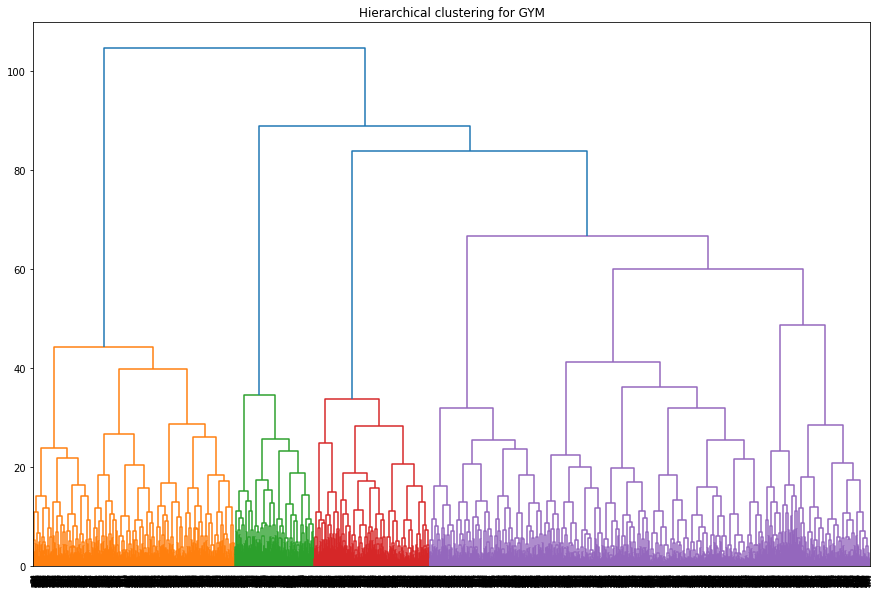

In [27]:
linked = linkage(x_sc, method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()

The above dendrogram graph indicates 4 clusters we can single out.<br>
However, for convenience sake (unity and comparison between students) we'll set the number of clusters to 5 in the next task.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good!

</div>

**Training the clustering model with the K-means algorithm and predicting customer clusters**<br>
Now that we have an optimal number of clusters, we'll pass it to the K-means algorithm. Then train the model and predict customer clusters:

In [28]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)

<div class="alert alert-success">
<b>Reviewer's comment</b>

It's great that you set the random state, which makes your research reproducible

</div>

The clusters indices are stored in the labels variable above. To present them in our dataset we'll store the labels in a new column - 'cluster_km':

In [29]:
data['cluster_km'] = labels

**The mean feature values for clusters**<br>
We'll group the data by cluster and calculate the features mean values:

In [30]:
features_mean = data.drop('churn',axis=1).groupby('cluster_km').mean()
features_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161


The features means table implies a relationship between some of the features.<br>
For example, it seems that contract period, group visits, lifetime, age, additional charges and visits frequency are related features. In that way clusters 0 and 4 have relatively high values across these features, while clusters 2 and 3 lag behind in the same parameters.<br>
It is still left to find out the influence of these features on customer churn rate, but it is a plausible assumption that customers who sign a longer period contracts, participate in groups, spend more on gym services, and visit the gym more often - tend to be loyal customers, and vice versa.

**Distributions of features for the clusters**<br>
We'll create a for loop that iterate over the features and make a KDE plot for each feature by clusters:<br>
(the function excluded plots of 'clusters_km' column and of 'phone' column that didn't provide us with any useful information)

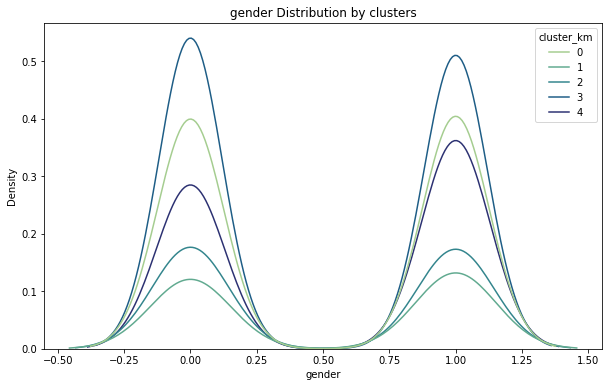

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


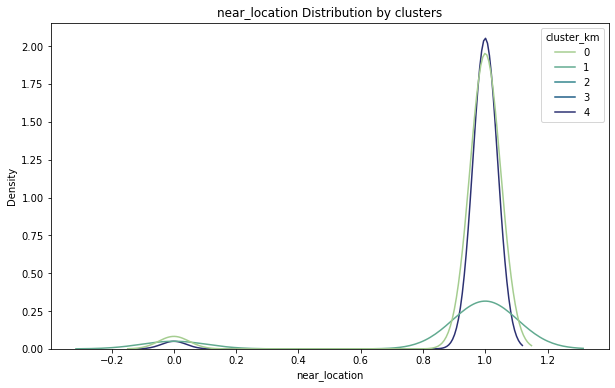

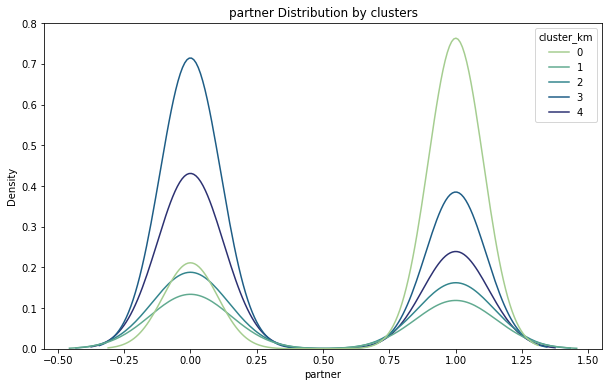

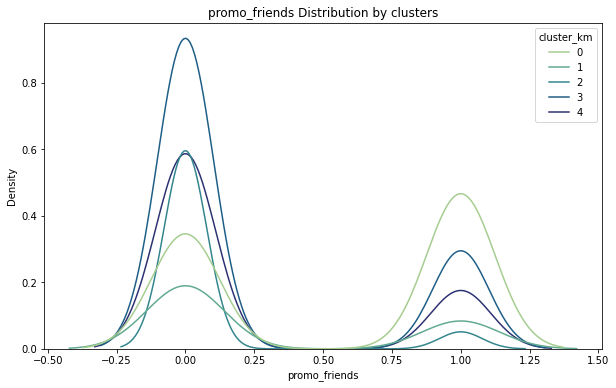

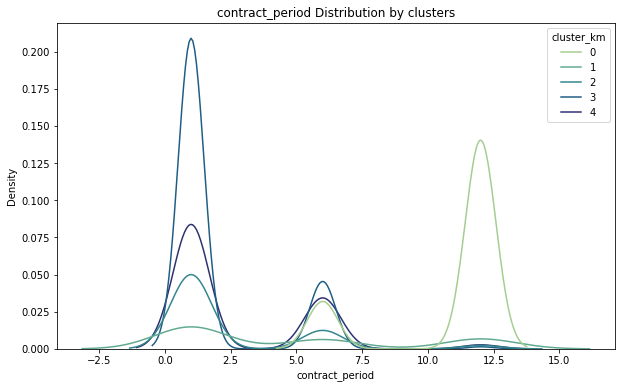

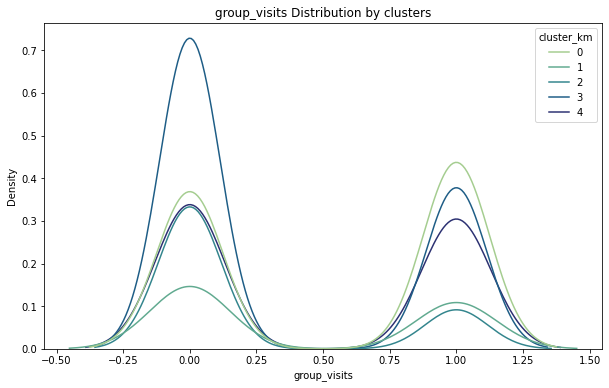

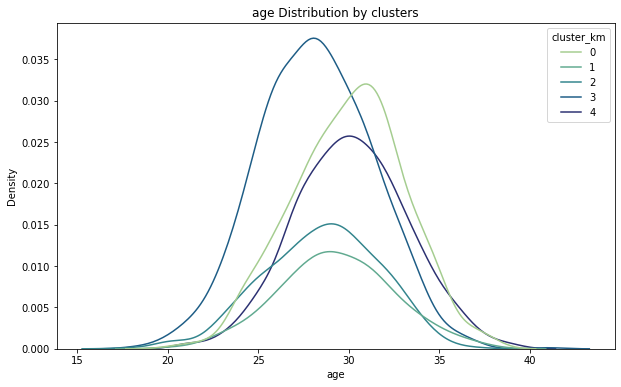

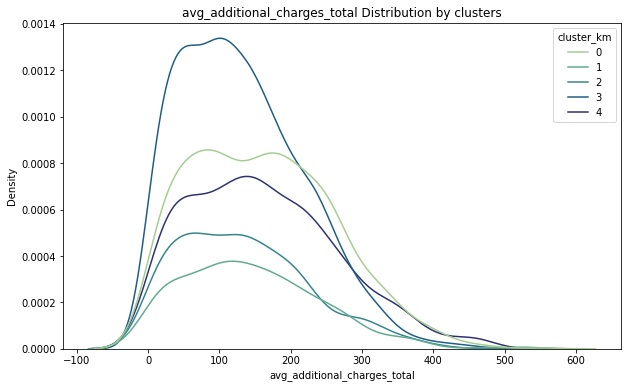

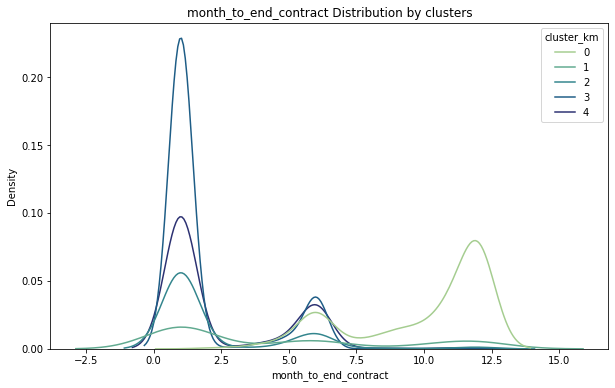

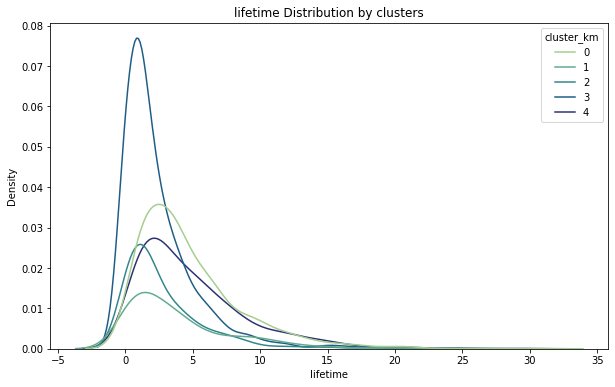

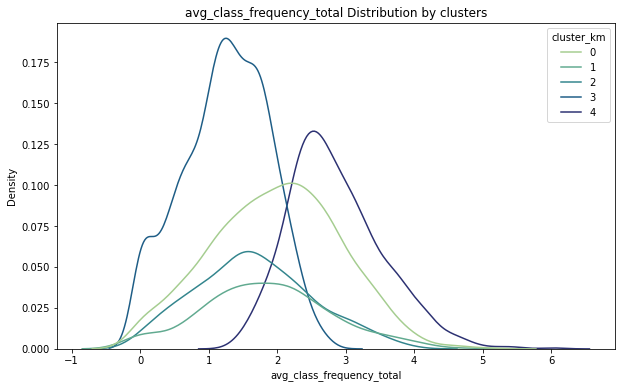

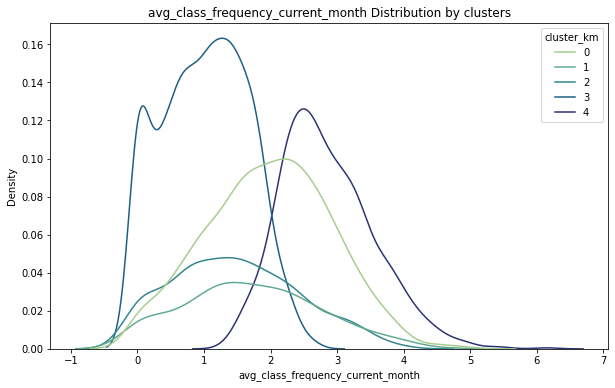

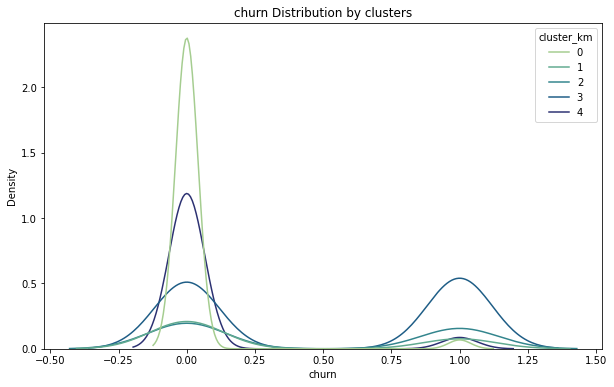

In [31]:
for i in data.columns:
    if i == 'cluster_km' or i == 'phone':
        continue
    else:
        plt.figure(figsize=(10,6))
        sns.kdeplot(data=data, x=i, hue='cluster_km', palette='crest')
        plt.title(i + ' Distribution by clusters')
        plt.show()

The kernel density estimate (KDE) plot of features distribution by clusters visualize and emphasize the developing picture of clusters behavior that we came up with earlier. <br>
Another noticable fact that is drawn from the plots is the distributions shape - almost all the features across the 5 clusters are normally (or close to normal) distributed. <br>
Only the lifetime feature shows a right-skewed distribution. The rest are bimodal distributions that represent the binary variables.

**Calculating churn rate for each cluster**<br>
We'll group the data by cluster, count the number of users in each group (counting any column will represent this amount), sum up the churn column for each group (thus get the number of leaving customers which are respresented by '1'). We'll subtract leaving customers from total customers to find active customers, and calculate the churn rate according to the traditional formula (in this specific case we would get the same final result by 'data.groupby('cluster_km')['churn'].value_counts(normalize=True)').<br>
Since our data has no time frame or dates, we'll consider the total number of customers as the number of customers at the start period, and the staying customers as the number of customers in the following month (as suggested by the original formula):

In [32]:
cluster_churn = data.groupby('cluster_km').agg({
    'phone' : 'count',
    'churn' : 'sum'
}).rename(columns={
    'phone' : 'total_customers',
    'churn' : 'leaving_customers'
})
cluster_churn['active_customers'] = cluster_churn['total_customers'] - cluster_churn['leaving_customers']
cluster_churn['churn_rate'] = (cluster_churn['active_customers'] / cluster_churn['total_customers'] -1) * 100
cluster_churn

,total_customers,leaving_customers,active_customers,churn_rate
cluster_km,,,,
0,1010,28,982,-2.772277
1,385,103,282,-26.753247
2,505,224,281,-44.356436
3,1262,649,613,-51.426307
4,838,57,781,-6.801909


Displaying only the relevant column:

In [33]:
cluster_churn['churn_rate']

cluster_km
0    -2.772277
1   -26.753247
2   -44.356436
3   -51.426307
4    -6.801909
Name: churn_rate, dtype: float64

As shown in the above table, there are noticable differences in churn rate between clusters.<br>
Indeed, As we assumed earlier, clusters 0 and 4 who had the best vlaues in the core features, also have the lowest churn rate (2.8%, 6.8% respectively), that is consist of the loyal customers. Clusters 2 and 3, who had low values in those feaures, turn out to have the highest churn rate (44%, 51% respectively), means cusotmers that are prone to leaving.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Clusters were identified and studied successfully!

</div>

## Conclusions and Recommendations

The analysis process included data preparation, exploratory data analysis, building a model of churn prediction and a model of customer clusters prediction, and plotting distributions for features.<br>
The analysis results lead us to the following conclusions ragarding the gym's customer churn rate :

- The customer churn rate is related to several features, mainly the contract period, group visits, age, lifetime, additional charges and visits frequency. 
- Groups (clusters) of customers who showed high values in these features, had the lowest churn rate, and vice versa.
- Background features such as gender, near location and partner company didn't have much influence on churn rate. 

According to these findings, the recommendations are as follows:
- Building a strategy that might increase customer's involvement, commitment and sense of belonging, through encouraging participation in group sessions, signing long-term contracts, and visit the gym more frequently.
- Invest in attracting customers to increase their additional services purchase.
- Consider adjustments in the marketing strategy (and gym operation aspects) so that they will address more middle adulthood customers (around the age of 30).

<div class="alert alert-success">
<b>Reviewer's comment</b>

Nice summary! Recommendations make sense and are consistent with your research, well done!

</div>